### **CÓ NHỮNG PHƯƠNG THỨC NÀO KHÁC ĐỂ CẢI THIỆN HIỆU SUẤT CỦA CANNY?**

#### Hiệu suất của Canny có thể được cải thiện bằng cách điều chỉnh tiền xử lý, tham số, và hậu xử lý, cũng như kết hợp với các phương pháp khác.

#### 1️ Cải thiện bước tiền xử lý (Pre-processing)

##### Làm trơn ảnh tốt hơn trước khi áp dụng Canny

Canny rất nhạy với nhiễu → tiền xử lý tốt giúp:

 - Giảm cạnh giả (FP)

 - Tăng Precision

Phương pháp:

 - Gaussian Blur (mặc định)

 - Median Blur (tốt với nhiễu muối tiêu)

 - Bilateral Filter (giữ biên tốt)

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

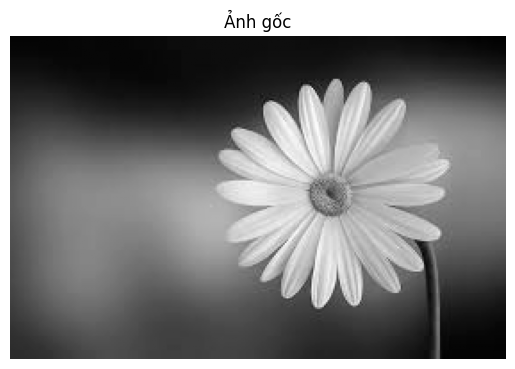

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:\\Users\\PC\\Downloads\\hoa.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Ảnh gốc")
plt.axis("off")


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

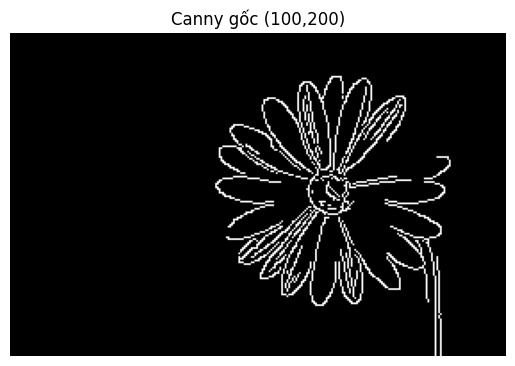

In [38]:
edges_base = cv2.Canny(img, 100, 200)

plt.imshow(edges_base, cmap="gray")
plt.title("Canny gốc (100,200)")
plt.axis("off")


Đây là kết quả Canny ban đầu, dùng làm mốc so sánh (baseline).


#### Tiền xử lý để cải thiện (Pre-processing)

##### Gaussian Blur

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

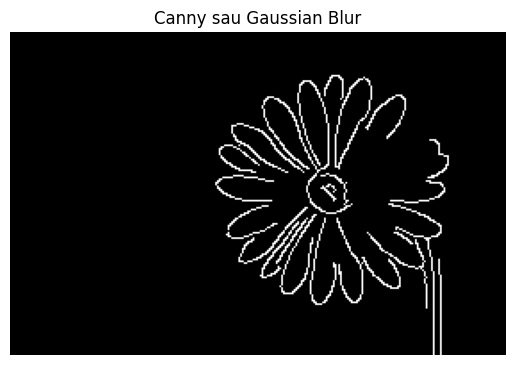

In [39]:
blur = cv2.GaussianBlur(img, (5,5), 1.4)
edges_blur = cv2.Canny(blur, 50, 150)

plt.imshow(edges_blur, cmap="gray")
plt.title("Canny sau Gaussian Blur")
plt.axis("off")


- Gaussian Blur được sử dụng nhằm làm trơn ảnh trước khi phát hiện cạnh.
- Bước tiền xử lý này giúp giảm nhiễu và các biến thiên cường độ nhỏ,
từ đó làm giảm số lượng cạnh giả và cải thiện độ ổn định của thuật toán
Canny.

#### Bilateral Filter

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

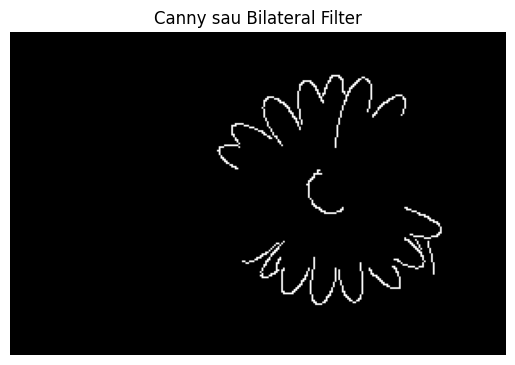

In [40]:
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
edges_bilateral = cv2.Canny(bilateral, 100, 200)

plt.imshow(edges_bilateral, cmap="gray")
plt.title("Canny sau Bilateral Filter")
plt.axis("off")


- Bilateral Filter được áp dụng để làm trơn ảnh trong khi vẫn bảo toàn
các biên quan trọng. 
- So với Gaussian Blur, phương pháp này cho kết quả
trực quan tốt hơn do giữ được biên sắc nét, giảm đáng kể nhiễu nền và
tăng độ chính xác của các cạnh được phát hiện.

#### Điều chỉnh ngưỡng Canny (Threshold tuning)

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

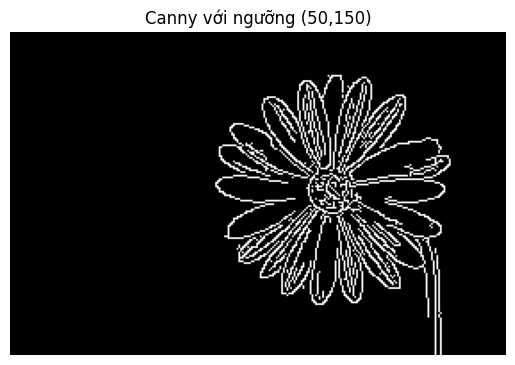

In [41]:
edges_tuned = cv2.Canny(img, 50, 150)

plt.imshow(edges_tuned, cmap="gray")
plt.title("Canny với ngưỡng (50,150)")
plt.axis("off")


Giảm ngưỡng giúp phát hiện thêm các cạnh yếu,
làm tăng số lượng cạnh được phát hiện (Recall tăng).


#### Tự động chọn ngưỡng (Auto Canny)

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

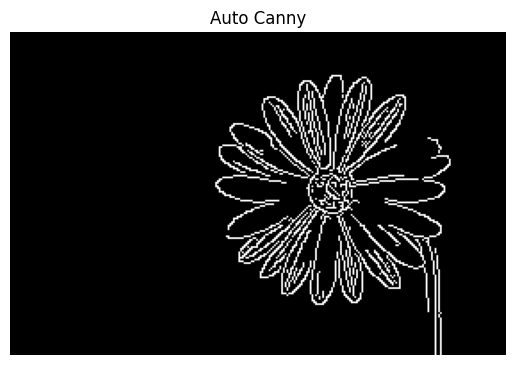

In [42]:
v = np.median(img)
lower = int(max(0, 0.66 * v))
upper = int(min(255, 1.33 * v))

edges_auto = cv2.Canny(img, lower, upper)

plt.imshow(edges_auto, cmap="gray")
plt.title("Auto Canny")
plt.axis("off")


- Auto Canny được sử dụng để tự động xác định ngưỡng phát hiện cạnh dựa
trên giá trị trung vị cường độ sáng của ảnh.
- Phương pháp này giúp thuật
toán Canny hoạt động ổn định hơn đối với các ảnh có điều kiện ánh sáng
khác nhau mà không cần điều chỉnh tham số thủ công.

#### Hậu xử lý (Post-processing)

##### Nối các cạnh bị đứt

(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

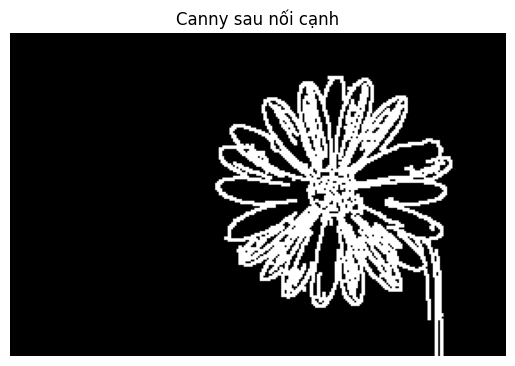

In [43]:
kernel = np.ones((2,2), np.uint8)
edges_linked = cv2.dilate(edges_tuned, kernel, iterations=1)


plt.imshow(edges_linked, cmap="gray")
plt.title("Canny sau nối cạnh")
plt.axis("off")


- Các phép toán hình thái học được áp dụng nhằm nối các đoạn cạnh bị đứt
nhẹ.
- Trong thực nghiệm này, chỉ sử dụng phép giãn (dilation) với kernel
nhỏ để cải thiện tính liên tục của cạnh, tránh làm dày biên hoặc gây
dính các cạnh không liên quan.

#### Đánh giá lại bằng Precision – Recall
Sau khi áp dụng các phương pháp cải thiện cho thuật toán Canny
(Canny gốc, Gaussian Blur, Bilateral Filter, điều chỉnh ngưỡng,
Auto Canny và nối cạnh), chất lượng phát hiện cạnh được đánh giá
định lượng bằng Precision, Recall và F1-score.

Các kết quả được so sánh pixel-wise với ảnh Ground Truth.

In [47]:
gt = cv2.imread("C:\\Users\\PC\\Downloads\\hoa_edge_gt.png", 
                cv2.IMREAD_GRAYSCALE)
gt = cv2.resize(gt, (img.shape[1], img.shape[0]))
gt_bin = (gt > 128).astype(np.uint8)
print("GT shape:", gt_bin.shape)


GT shape: (181, 278)


In [48]:
def evaluate_pr(edges, gt_bin):
    edges_bin = (edges > 0).astype(np.uint8)
    TP = np.sum((edges_bin == 1) & (gt_bin == 1))
    FP = np.sum((edges_bin == 1) & (gt_bin == 0))
    FN = np.sum((edges_bin == 0) & (gt_bin == 1))
    precision = TP / (TP + FP + 1e-6)
    recall    = TP / (TP + FN + 1e-6)
    f1        = 2 * precision * recall / (precision + recall + 1e-6)
    return TP, FP, FN, precision, recall, f1


In [49]:
methods = {
    "Canny gốc (100,200)": edges_base,
    "Canny + Gaussian Blur": edges_blur,
    "Canny + Bilateral": edges_bilateral,
    "Canny (50,150)": edges_tuned,
    "Auto Canny": edges_auto,
    "Canny + nối cạnh": edges_linked
}
for name, edges in methods.items():
    TP, FP, FN, p, r, f1 = evaluate_pr(edges, gt_bin)
    print(name)
    print(f"  TP={TP}, FP={FP}, FN={FN}")
    print(f"  Precision={p:.3f}")
    print(f"  Recall   ={r:.3f}")
    print(f"  F1-score ={f1:.3f}\n")


Canny gốc (100,200)
  TP=1815, FP=501, FN=20180
  Precision=0.784
  Recall   =0.083
  F1-score =0.149

Canny + Gaussian Blur
  TP=1356, FP=456, FN=20639
  Precision=0.748
  Recall   =0.062
  F1-score =0.114

Canny + Bilateral
  TP=538, FP=234, FN=21457
  Precision=0.697
  Recall   =0.024
  F1-score =0.047

Canny (50,150)
  TP=2601, FP=562, FN=19394
  Precision=0.822
  Recall   =0.118
  F1-score =0.207

Auto Canny
  TP=2299, FP=555, FN=19696
  Precision=0.806
  Recall   =0.105
  F1-score =0.185

Canny + nối cạnh
  TP=5872, FP=1135, FN=16123
  Precision=0.838
  Recall   =0.267
  F1-score =0.405



#### Nhận xét

Hiệu suất của thuật toán Canny có thể được cải thiện bằng cách:
- Tiền xử lý ảnh để giảm nhiễu
- Điều chỉnh hoặc tự động chọn ngưỡng phát hiện cạnh
- Thay đổi tham số Gaussian
- Áp dụng hậu xử lý để nối các cạnh bị đứt

Các phương pháp trên giúp cải thiện Precision, Recall
và chất lượng tổng thể của các cạnh được phát hiện.
